,시간,규모,진앙,위도,경도,위치
0,2013-01-025:53:00AM,2.5,12.375887,33.37,127.27,제주서귀포시성산동쪽36km해역
1,2013-01-151:31:00PM,2.8,16.000000,36.59,129.73,경북영덕군동북동쪽38km해역
2,2013-01-268:57:00AM,2.4,21.000000,36.11,127.73,충북영동군남서쪽9km지역
3,2013-02-045:39:00AM,3.1,12.375887,36.55,128.90,경북안동시동쪽15km지역
4,2013-02-059:25:00PM,3.5,11.000000,35.77,127.97,경남거창군북북동쪽11km지역
...,...,...,...,...,...,...
991,2021-12-0910:57:00AM,2.6,17.000000,33.85,125.51,전남신안군흑산도남쪽91km해역
992,2021-12-145:19:00PM,4.9,17.000000,33.09,126.16,제주서귀포시서남서쪽41km해역
993,2021-12-153:06:00PM,2.8,14.000000,33.14,126.15,제주서귀포시서남서쪽40km해역
994,2021-12-1510:02:00PM,2.3,10.000000,35.79,127.80,경남거창군북서쪽15km지역


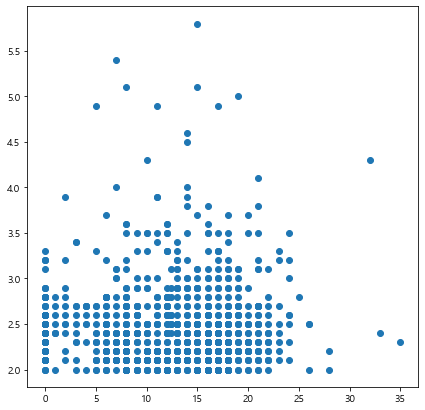

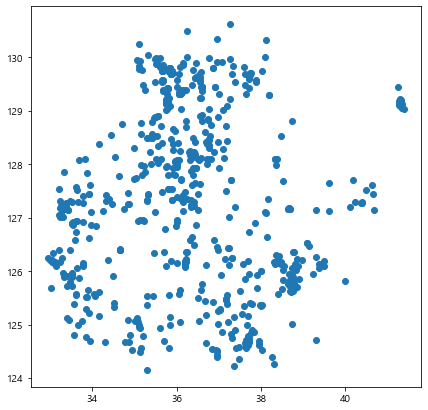

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('./Data/지진데이터.csv')
df = df.fillna(df['진앙'].mean())


plt.figure(figsize=(7,7))
plt.scatter(df['진앙'], df['규모'])


plt.figure(figsize=(7,7))
plt.scatter(df['위도'], df['경도'])


df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[[-1.55163011 -0.18704299]
 [-9.91438321  0.34185349]
 [ 5.76180306  0.02031567]]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


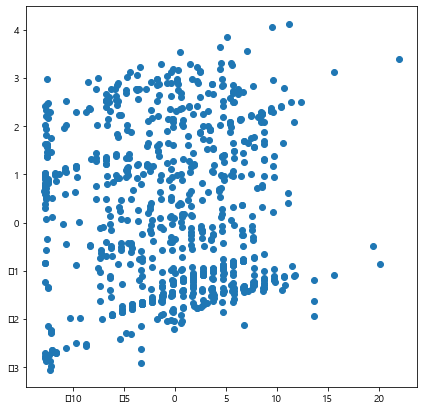

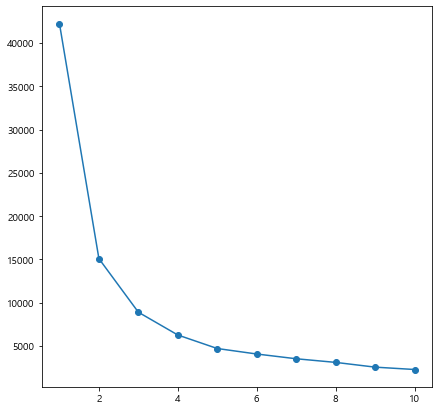

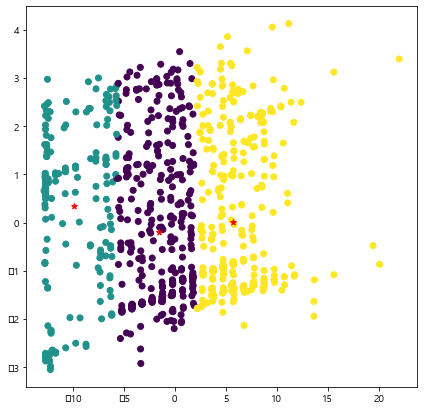

In [22]:
pca = PCA(n_components=2)
transform = pca.fit_transform(df[['규모', '진앙', '위도', '경도']])
df['pca_x'] = transform[:,0]
df['pca_y'] = transform[:,1]

plt.figure(figsize=(7,7))
plt.scatter(df['pca_x'], df['pca_y'])


inertias = []
for i in range(1, 11):
    temp = KMeans(n_clusters=i)
    temp.fit(df[['pca_x', 'pca_y']])
    inertias.append(temp.inertia_)

plt.figure(figsize=(7,7))
plt.plot(range(1, 11), inertias, '-o')

model = KMeans(n_clusters=3)
model.fit(df[['pca_x', 'pca_y']])
center = model.cluster_centers_
df['cluster'] = model.labels_

plt.figure(figsize=(7,7))
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='*')

print(center)